In [1]:
from LoopStructural.supports.structured_tetra import TetMesh
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

In [2]:
def plot_tetra(name,colour,points):
    surf = lv.triangles(name)
    surf.vertices(points)
    surf.indices(trimask)
    surf.colours(colour)

In [54]:
mesh = TetMesh(nsteps=[4,4,4],step_vector=[0.2,0.2,0.2])
tetra_index = np.arange(0,mesh.ntetra)
neighbours = np.zeros((mesh.ntetra,4)).astype(int)
neighbours[:] = -9999
# neighbours[tetra_index%5 == 0,:] = tetra_index[tetra_index%5 == 0,None]  + np.arange(1,5)[None,:] # first tetra is the centre one so all of its neighbours are in the same cell
neighbours[tetra_index%5 != 0,0] = np.tile(tetra_index[tetra_index%5 == 0],(4,1)).flatten(order='F') # add first tetra to other neighbours

# now create masks for the different tetra indexes
one_mask = tetra_index%5 ==1
two_mask = tetra_index%5==2
three_mask = tetra_index%5 ==3
four_mask = tetra_index%5 ==4
# print(mesh.global_index_to_cell_index(tetra_index//5))
odd_mask = np.sum(mesh.global_index_to_cell_index(tetra_index//5),axis=0) % 2 == 1
odd_mask = ~odd_mask.astype(bool)
# raise BaseException
# print(even_mask.astype(bool))
# print(np.sum(mesh.global_index_to_cell_index(tetra_index//5),axis=0))
even_mask = odd_mask# ~even_mask
# print(tetra_index[odd_mask]//5)
# raise BaseException
masks = []
masks.append([np.logical_and(one_mask, even_mask),
                      np.array([[1, 0, 0, 4], [0, 1, 0, 1], [0, 0, 1, 2]])])
masks.append([np.logical_and(two_mask, even_mask),
              np.array([[1, 0, 0, 3], [0, -1, 0, 2], [0, 0, -1, 1]])])
masks.append([np.logical_and(three_mask, even_mask),
              np.array([[-1, 0, 0, 1], [0, -1, 0, 4], [0, 0, 1, 3]])])
masks.append([np.logical_and(four_mask, even_mask),
              np.array([[-1, 0, 0, 2], [0, 1, 0, 3], [0, 0, -1, 4]])])

masks.append([np.logical_and(one_mask, odd_mask),
              np.array([[1, 0, 0, 4], [0, 1, 0, 1], [0, 0, 1, 2]])])
masks.append([np.logical_and(two_mask, odd_mask),
              np.array([[1, 0, 0, 3], [0, -1, 0, 2], [0, 0, -1, 1]])])
masks.append([np.logical_and(three_mask, odd_mask),
              np.array([[-1, 0, 0, 1], [0, -1, 0, 4], [0, 0, 1, 3]])])
masks.append([np.logical_and(four_mask, odd_mask),
              np.array([[-1, 0, 0, 2], [0, 1, 0, 3], [0, 0, -1, 4]])])
for m in masks:
    logic = m[0]
    mask = m[1]
    # print('m',mask)
#neighbours[np.logical_and(one_mask,even_mask)] = 0 #x+1, t = 4 and z-1 t=2, y+1 t3
    c_xi, c_yi, c_zi = mesh.global_index_to_cell_index(tetra_index[logic]//5)
    # mask = np.array([[1,0,0,4],[0,0,-1,2],[0,1,0,3],[0,0,0,0]])
    neigh_cell = np.zeros((c_xi.shape[0],3,3)).astype(int)
    neigh_cell[:,:,0] = c_xi[:,None]+mask[:,0]
    neigh_cell[:,:,1] = c_yi[:,None]+mask[:,1]
    neigh_cell[:,:,2] = c_zi[:,None]+mask[:,2]
    inside = neigh_cell[:,:,0] >= 0
    inside = np.logical_and(inside,neigh_cell[:,:,1]>=0)
    inside = np.logical_and(inside,neigh_cell[:,:,2]>=0)
    inside = np.logical_and(inside,neigh_cell[:,:,0] < mesh.n_cell_x)
    inside = np.logical_and(inside,neigh_cell[:,:,1] < mesh.n_cell_y)
    inside = np.logical_and(inside,neigh_cell[:,:,2] < mesh.n_cell_z)
    # print(neigh_cell)
    # print(mesh.n_cell_x,mesh.n_cell_y,mesh.n_cell_z)
    # raise BaseException
    global_neighbour_idx = np.zeros((c_xi.shape[0],4)).astype(int)
    global_neighbour_idx[:] = -1
    global_neighbour_idx = (neigh_cell[:,:,0]+neigh_cell[:,:,1]*\
                          mesh.n_cell_x+neigh_cell[:,:,2]*mesh.n_cell_x*mesh.n_cell_y)*5+mask[:,3]
    #print('gi', global_neighbour_idx)
    # print(global_neighbour_idx)
    #*5+mask[:,3]
    global_neighbour_idx[~inside] = -1
    neighbours[logic,1:] = global_neighbour_idx
print(np.hstack([np.array([np.arange(0,len(neighbours))]).T,neighbours]))

[[    0 -9999 -9999 -9999 -9999]
 [    1     0 -9999 -9999 -9999]
 [    2     0 -9999 -9999 -9999]
 [    3     0 -9999 -9999 -9999]
 [    4     0    -1    18    -1]
 [    5 -9999 -9999 -9999 -9999]
 [    6     5 -9999 -9999 -9999]
 [    7     5 -9999 -9999 -9999]
 [    8     5 -9999 -9999 -9999]
 [    9     5 -9999 -9999 -9999]
 [   10 -9999 -9999 -9999 -9999]
 [   11    10 -9999 -9999 -9999]
 [   12    10 -9999 -9999 -9999]
 [   13    10 -9999 -9999 -9999]
 [   14    10     7    28    -1]
 [   15 -9999 -9999 -9999 -9999]
 [   16    15 -9999 -9999 -9999]
 [   17    15 -9999 -9999 -9999]
 [   18    15 -9999 -9999 -9999]
 [   19    15 -9999 -9999 -9999]
 [   20 -9999 -9999 -9999 -9999]
 [   21    20 -9999 -9999 -9999]
 [   22    20 -9999 -9999 -9999]
 [   23    20 -9999 -9999 -9999]
 [   24    20    17    38    -1]
 [   25 -9999 -9999 -9999 -9999]
 [   26    25 -9999 -9999 -9999]
 [   27    25 -9999 -9999 -9999]
 [   28    25 -9999 -9999 -9999]
 [   29    25 -9999 -9999 -9999]
 [   30 -9

114 4
0
1
2
3
4



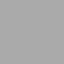

In [55]:
import lavavu
lv = lavavu.Viewer()
colours = ['red','green','blue','purple','cyan']
nodes = mesh.nodes
trimask = [[0,1,2],[0,1,3],[1,2,3],[0,2,3]]
elements = mesh.get_elements()
j = 114
n = neighbours[j]
#for j, n in enumerate(neighbours):
    
# if np.any(n == -9999):
#     continue
n = n.tolist()
n.append(j)
print(j, j%5)
for k,e in enumerate(n):
    print(k)
    if e == -1:
        continue
    plot_tetra('tetra_%i'%k,colours[k],nodes[elements[e]])

# break
lv.control.Panel()
lv.control.ObjectList()
lv.control.show()

In [16]:
elements[0]

array([ 0, 20, 17,  5], dtype=int64)

In [6]:
nodes[elements[0]]#[trimask]

array([[0. , 0. , 0. ],
       [0.2, 0.2, 0. ],
       [0. , 0.2, 0.2],
       [0. , 0. , 0.2]])

In [7]:
from LoopStructural.cython.dsi_helper import tetra_neighbours
elements = mesh.get_elements()
neighbours1 = np.zeros((elements.shape[0],4)).astype('int64')
neighbours1[:] = -1
tetra_neighbours(elements,neighbours1)

diff = np.sort(neighbours1)-np.sort(neighbours)
for i in range(neighbours1.shape[0]):
    if np.sum(diff[i,:]) > 0:
#         print(neighbours1[i,:],neighbours[i,:])
        print(mesh.global_index_to_cell_index(i))

(array([0], dtype=int32), array([0], dtype=int32), array([1], dtype=int32))
(array([0], dtype=int32), array([0], dtype=int32), array([2], dtype=int32))
(array([0], dtype=int32), array([0], dtype=int32), array([3], dtype=int32))
(array([0], dtype=int32), array([0], dtype=int32), array([4], dtype=int32))



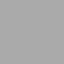

In [8]:
import lavavu
lv = lavavu.Viewer()

lv.control.Panel()
lv.control.ObjectList()
lv.control.show()



[1, 2, 3, 4, 0]
0
1
2
3
4


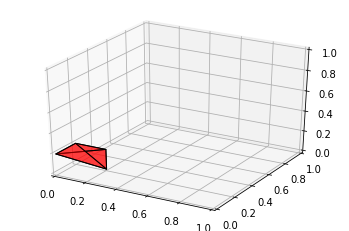

In [9]:
fig = plt.figure()
colours = ['red','green','blue','purple','cyan']
ax = fig.add_subplot(111, projection='3d')
nodes = mesh.nodes
trimask = [[0,1,2],[0,1,3],[1,2,3],[0,2,3]]
elements = mesh.get_elements()
for j, n in enumerate(neighbours):
    if np.any(n == -9999):
        continue
    n = n.tolist()
    n.append(j)
    print(n)
    for k,e in enumerate(n):
        print(k)
        if e == -1:
            continue
        if k == 0:
            for i in range(4):
    #             print(elements[e])
                temp = nodes[None,elements[e][trimask[i]]]
    #             print(temp.shape)
                # print(temp)
                # verts = [[nodes[0,triangles[0]],nodes[1,triangles[0]],nodes[2,triangles[0]]]]
                # print(verts)
                ax.add_collection(Poly3DCollection(temp,facecolors=colours[k],edgecolors='k',alpha=0.5))  
    break

In [10]:

nodes = mesh.nodes
# for c in range(len(colours)):
for i in range(4):
    temp = nodes[None,tetra[c][trimask[i]]]
    # print(temp)
    # verts = [[nodes[0,triangles[0]],nodes[1,triangles[0]],nodes[2,triangles[0]]]]
    # print(verts)
    ax.add_collection(Poly3DCollection(temp,facecolors=colours[c],edgecolors='k',alpha=0.5))

NameError: name 'tetra' is not defined

In [ ]:
%%timeit
mesh = TetMesh(nsteps=[100,100,100])
tetra_index = np.arange(0,mesh.ntetra)
neighbours = np.zeros((mesh.ntetra,4)).astype(int)
neighbours[:] = -9999
# neighbours[tetra_index%5 == 0,:] = tetra_index[tetra_index%5 == 0,None]  + np.arange(1,5)[None,:] # first tetra is the centre one so all of its neighbours are in the same cell
neighbours[tetra_index%5 != 0,0] = np.tile(tetra_index[tetra_index%5 == 0],(4,1)).flatten(order='F') # add first tetra to other neighbours

# now create masks for the different tetra indexes
one_mask = tetra_index%5 ==1
two_mask = tetra_index%5==2
three_mask = tetra_index%5 ==3
four_mask = tetra_index%5 ==4
# print(mesh.global_index_to_cell_index(tetra_index//5))
odd_mask = np.sum(mesh.global_index_to_cell_index(tetra_index//5),axis=0) % 2 == 1
odd_mask = odd_mask.astype(bool)
# raise BaseException
# print(even_mask.astype(bool))
# print(np.sum(mesh.global_index_to_cell_index(tetra_index//5),axis=0))
even_mask = ~odd_mask# ~even_mask
# print(tetra_index[odd_mask]//5)
# raise BaseException
masks = []
masks.append([np.logical_and(one_mask,odd_mask),np.array([[1,0,0,2],[0,-1,0,4],[0,0,-1,3]])])
masks.append([np.logical_and(two_mask.astype(bool),even_mask),np.array([[-1,0,0,1],[0,-1,0,3],[0,0,-1,4]])])
masks.append([np.logical_and(three_mask,odd_mask),np.array([[-1,0,0,4],[0,1,0,2],[0,0,-1,1]])])
masks.append([np.logical_and(four_mask,even_mask),np.array([[1,0,0,3],[0,1,0,1],[0,0,-1,2]])])

masks.append([np.logical_and(one_mask,odd_mask),np.array([[1,0,0,2],[0,-1,0,4],[0,0,-1,3]])])
masks.append([np.logical_and(two_mask,odd_mask),np.array([[1,0,0,1],[0,1,0,3],[0,0,1,4]])])
masks.append([np.logical_and(three_mask,odd_mask),np.array([[-1,0,0,4],[0,1,0,2],[0,0,-1,1]])])
masks.append([np.logical_and(four_mask,odd_mask),np.array([[-1,0,0,3],[0,-1,0,1],[0,0,1,2]])])

for m in masks:
    logic = m[0]
    mask = m[1]
    # print('m',mask)
#neighbours[np.logical_and(one_mask,even_mask)] = 0 #x+1, t = 4 and z-1 t=2, y+1 t3
    c_xi, c_yi, c_zi = mesh.global_index_to_cell_index(tetra_index[logic]//5)
    # mask = np.array([[1,0,0,4],[0,0,-1,2],[0,1,0,3],[0,0,0,0]])
    neigh_cell = np.zeros((c_xi.shape[0],3,3)).astype(int)
    neigh_cell[:,:,0] = c_xi[:,None]+mask[:,0]
    neigh_cell[:,:,1] = c_yi[:,None]+mask[:,1]
    neigh_cell[:,:,2] = c_zi[:,None]+mask[:,2]
    inside = neigh_cell[:,:,0] >= 0
    inside = np.logical_and(inside,neigh_cell[:,:,1]>=0)
    inside = np.logical_and(inside,neigh_cell[:,:,2]>=0)
    inside = np.logical_and(inside,neigh_cell[:,:,0] < mesh.n_cell_x)
    inside = np.logical_and(inside,neigh_cell[:,:,1] < mesh.n_cell_y)
    inside = np.logical_and(inside,neigh_cell[:,:,2] < mesh.n_cell_z)
    # print(neigh_cell)
    # print(mesh.n_cell_x,mesh.n_cell_y,mesh.n_cell_z)
    # raise BaseException
    global_neighbour_idx = np.zeros((c_xi.shape[0],4)).astype(int)
    global_neighbour_idx[:] = -1
    global_neighbour_idx = (neigh_cell[:,:,0]+neigh_cell[:,:,1]*\
                          mesh.n_cell_x+neigh_cell[:,:,2]*mesh.n_cell_x*mesh.n_cell_y)*5+mask[:,3]

    # print(global_neighbour_idx)
    #*5+mask[:,3]
    global_neighbour_idx[~inside] = -1
    neighbours[logic,1:] = global_neighbour_idx

In [ ]:
100*100*100*5